## Цели занятия
1. Дать чёткое определение монолитным приложениям, сервис-ориентированной архитектуре и микросервисной архитектуре.
2. Изучить принципы постепенного выделения сервисов из монолита.
3. Рассмотреть роль и функции API-Gateway в окружении микросервисов.

## Введение
Какой архитектурный стиль серверного приложения выбрать?
Мы пройдём путь от классического монолита через сервис-ориентированную архитектуру (SOA) к микросервисам с использованием API-Gateway.

## 1. Монолитные приложения

Монолитным приложением называют программу, работающую в одном процессе операционной системы: все функции (слои) разрабатываются и разворачиваются одновременно.

Важно: монолит не является «абсолютным злом» — бывают ситуации, когда связность оправдана.

Плюсы:
- Простота разработки и отладки за счёт единой среды выполнения.
- Централизованная точка мониторинга и логирования.

Недостатки:
- Невозможность горизонтального масштабирования по частям.
- Жёсткая связанность модулей замедляет цикл разработки.
- Сложность внедрения новых технологий только для отдельных компонентов.
- Высокий риск регрессионных ошибок при изменении любой части кода.

Перед началом декомпозиции стоит задать вопросы о нагрузке и приоритетах (например, паттерн "Majestic monolith" для простой логики).

## 2. Сервис-ориентированная архитектура (SOA)

SOA возникла в 1990-х как разделение бизнес-логики и инфраструктуры. Сервисы автономны и имеют чётко определённые контракты взаимодействия. Обычно используется шина ESB (Enterprise Service Bus) для маршрутизации и трансформации сообщений; реестр сервисов хранит метаданные и служит точкой обнаружения.

Переход от монолита к SOA уменьшает связанность кода, но ESB может оставаться единой точкой отказа.

Пример описания сервиса на основе WSDL: см. изображение по ссылке внизу.


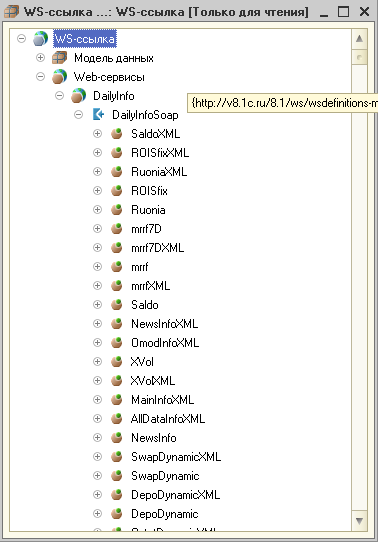

In [ ]:
from IPython.display import Image, display; display(Image('https://habrastorage.org/r/w780/getpro/habr/post_images/d65/8b4/7f7/d658b47f75e9630b4fe8a63c22d3bb37.png'))


## 3. Микросервисная архитектура (MSA)

MSA предполагает полное разделение сервисов: каждый микросервис разрабатывается, размещается и масштабируется независимо, имеет собственную БД и жизненный цикл. В отличие от SOA, нет тяжеловесной ESB: коммуникация реализуется напрямую (REST/HTTP, gRPC) или через брокеры сообщений.

Особенности:
- Каждый сервис владеет своим стеком технологий и данными.
- Активное применение контейнеризации (cgroups, Docker, Kubernetes) для упрощения развёртывания и изоляции.

Плюсы:
- Гибкое горизонтальное масштабирование по отдельным компонентам.
- Повышенная отказоустойчивость: сбой одного микросервиса не ломает всю систему.
- Независимые релизы упрощают внедрение новых версий.

Недостатки:
- Усложнённый мониторинг и трассировка транзакций.
- Обеспечение согласованности распределённых данных.
- Управление конфигурациями и секретами.
- Рост операционной нагрузки на DevOps-команду.

## 4. Принцип разделения монолитов на микросервисы

Что можно выделить из монолита?

- Домены: разделение по бизнес-контекстам (например, заказы, пользователи, склад). У каждого — своя БД.
- Бизнес-процессы: разделение по функциям (приём заказов, уведомления, выставление счетов).
- Данные: каждый сервис владеет своей информацией (пользователи, товары, платежи).
- Интерфейсы: разделение по типу клиентов (веб, мобильные приложения, API).
- Среда развёртывания: разные сервисы могут развертываться и масштабироваться отдельно.
- Протоколы: разные сервисы могут использовать разные протоколы (HTTP, gRPC и т.д.).

Как разделять?
- "Единовременный" или резкий переход возможен, но рискован.
- Рекомендуется промежуточный этап: выделение «мини-монолитов», затем постепенное дробление.
- Паттерн "strangler pattern": поэтапное вынесение функциональности и замена старого кода новыми сервисами по одному блоку за раз.

<font color="blue">Примечание: паттерн не сработает, если запросы не идентифицируются (например, отсутствуют нужные заголовки), и не всегда оправдан для мелких систем.</font>


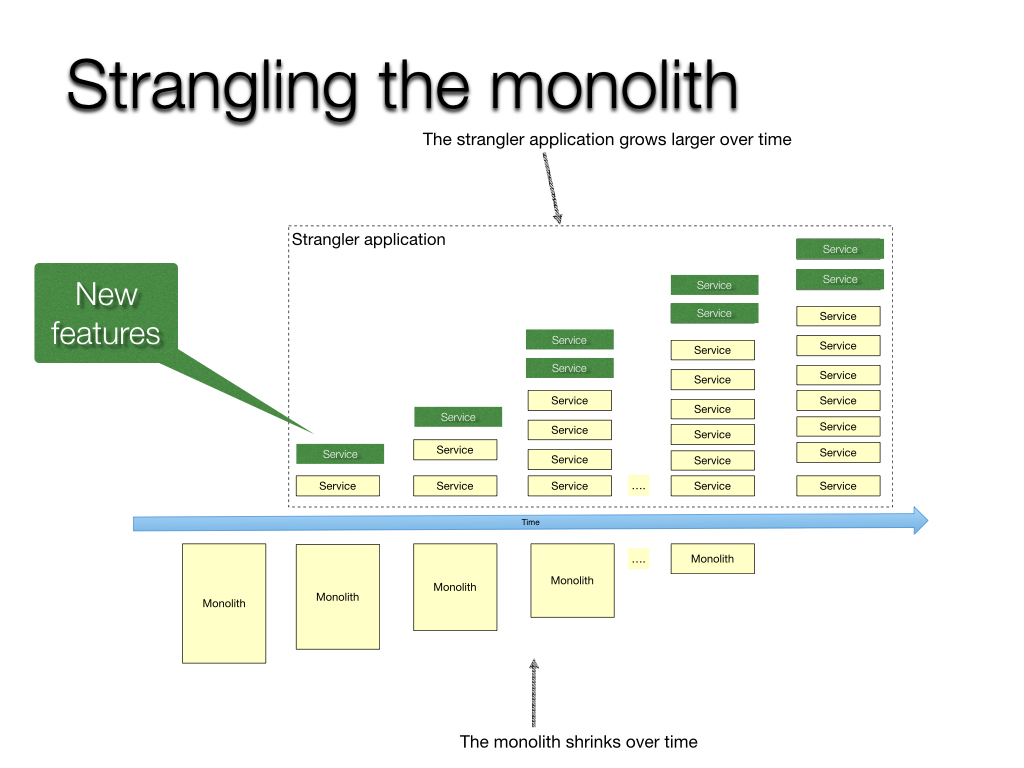

In [ ]:
display(Image('https://files.bool.dev/site/news/8aa3438a-61fe-4588-b1bb-798d1815f1e9/dcb30dd0-5cf7-497c-abeb-f3aa74ad9215.png'))

## Зачем нужна архитектура данных?

Разделять следует и данные, и код. Моделирование данных проходит несколько этапов:
- Концептуальная модель (модель домена): общее представление, сущности и связи, бизнес-правила.
- Логическая модель: более детальная модель с атрибутами сущностей и отношениями (без технических деталей).
- Физическая модель: конкретная схема хранения данных в выбранной СУБД (таблицы, ключи и т.д.).


## Зачем нужна архитектура кода?

Архитектура кода помогает управлять сложностью через рефакторинг — улучшение кода без добавления функциональности. Рефакторинг позволяет контролировать технический долг и поддерживать читабельность и сопровождаемость кода.

Рекомендуемая литература: Эмблер, Скотт В., Садаладж, Прамодкумар Дж. "Рефакторинг баз данных: эволюционное проектирование".

## Доменная архитектура (DDD)

DDD (Domain-Driven Design) — подход, ориентированный на глубокое понимание предметной области и использование этого знания для структуры кода.

Задача DDD — объединить разрозненные источники данных (кол-трекинг, CPA/CTR, веб-аналитика и т.д.) в единую доменную модель, которая отражает сущности и их взаимосвязи в контексте бизнес-процессов.

Пример: оценка эффективности рекламной кампании с учётом источника клика, страницы посадки, времени до звонка, расшифровки разговора, профиля пользователя и т.д.

Структура слоёв доменной архитектуры кода (пример):
- Слой приложения — меняется часто (новые фичи и метрики).
- Слой инфраструктуры — меняется часто (интеграции с внешними системами).
- Слой моделей предметной области — меняется редко (взаимосвязи бизнес-процессов).

Контрольные цели разделения на слои и домены:
- Снижение влияния изменений в одной предметной области на другие.
- Повышение понятности системы.
- Улучшение управляемости системы.


## 5. Взаимодействие с MSA через API Gateway

API Gateway располагается перед микросервисами и выступает центральной точкой входа для внешних запросов. Он скрывает внутреннюю сложность MSA от клиентов и предоставляет следующие функции:
- Маршрутизация запросов к нужным сервисам.
- Аутентификация и авторизация (централизовано).
- Агрегация ответов от нескольких сервисов.
- Кеширование, лимитирование, логирование и трансформация запросов/ответов.

Преимущество: клиенты не знают о количестве и расположении микросервисов; замена сервиса не затрагивает клиентов.

Популярные решения: Amazon API Gateway, Apache APISIX, Traefik, NGINX Plus.

## Итог

Подход к архитектуре (от монолита к микросервисам и обратно) всегда зависит от конкретного проекта. Рекомендуется:
- Выбирать стратегию постепенной декомпозиции вместо резкого разрезания монолита.
- Применять паттерны типа "strangler" при необходимости минимизировать риски.
- Использовать API Gateway для упрощения взаимодействия с внешними клиентами и централизации кросс-сервисных задач.

Материал даёт базовую карту для принятия решений при переходе от монолита к MSA и организации доменной и поведенческой архитектуры приложения.